In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import functions
from sklearn.preprocessing import StandardScaler

In [86]:
# Import data

#Matt's Data
kc = pd.read_csv('../../Data/matthew_clean_data.csv', index_col=0)
kc_trim = kc[kc['price'] < kc['price'].quantile(0.95)]
# Steve's data
s = pd.read_csv('../../Data/my_filtered_dataframe_id.csv', index_col=0)
# Tony's data
t = pd.read_csv('../../Data/cleanhousedata_id.csv', index_col=0)

t.set_index('id')
kc.set_index('id')
kct = kc_trim.merge(t, on='id')
s.set_index('id')
all_clean = kct.merge(s, on='id')


all_clean['view_y'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)
#all_clean['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)
all_clean.drop(
    columns=['date_x', 'yr_renovated_x', 'waterfront', 'cat_waterfront', 'view_x', 'cat_view', 'cat_condition',
             'cat_grade', 'price_x', 'date_y', 'yr_renovated_y', 'price_y', 'floors_3.5', 'zipcode', 'id', 'cat_zipcode', 'bedrooms', 'yr_built_y', 'grade_y', 'floors_2.5', 'bathrooms', 'floors_2.0'], inplace=True)
all_clean['view_y'] = all_clean['view_y'].astype('float')
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grade_x      18183 non-null  int64  
 1   yr_built_x   18183 non-null  int64  
 2   floors_1.5   18183 non-null  int64  
 3   floors_3.0   18183 non-null  int64  
 4   sqft_living  18183 non-null  int64  
 5   sqft_lot     18183 non-null  int64  
 6   price        18183 non-null  float64
 7   condition    18183 non-null  int64  
 8   view_y       18183 non-null  float64
 9   lat          18183 non-null  float64
 10  long         18183 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [91]:
ss = StandardScaler()
X = all_clean.drop(columns=['price'])
colms = X.columns
y = all_clean['price']
X = pd.DataFrame(X, columns=colms)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1835.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:23:28   Log-Likelihood:            -1.5615e+05
No. Observations:               12182   AIC:                         3.123e+05
Df Residuals:                   12171   BIC:                         3.124e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.51e+07   8.75e+05    -17.271      0.000   -1.68e+07   -1.34e+07
grade_x      6.302e+04   1317.498     47.835      0.000    6.04e+04    6.56e+04
yr_built_x   -705.0738     42.000    -16.787      0.000    -787.401    -622.747
floors_1.5   1.991e+04   3098.065      6.428      0.000    1.38e+04     2.6e+04
floors_3.0   2.933e+04   5474.360      5.357      0.000    1.86e+04    4.01e+04
sqft_living    66.1780      1.651     40.083      0.000      62.942      69.414
sqft_lot        0.2109      0.023      9.135      0.000       0.166       0.256
condition    1.714e+04   1320.342     12.979      0.000    1.45e+04    1.97e+04
view_y       1.799e+04   1130.404     15.916      0.000    1.58e+04    2.02e+04
lat          4.722e+05   5840.334     80.852      0.000    4.61e+05    4.84e+05
long         4.916e+04   6507.636      7.554      0.000    3.64e+04    6.19e+04
==============================================================================
Omnibus:                      174.055   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.263
Skew:                           0.266   Prob(JB):                     7.98e-42
Kurtosis:                       3.301   Cond. No.                     4.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.6012
Test R2: 0.5921
****
Train RMSE: $89,264.95
Test RMSE: $90,649.40
****
Train MAE: $70,457.37
Test MAE: $71,322.47


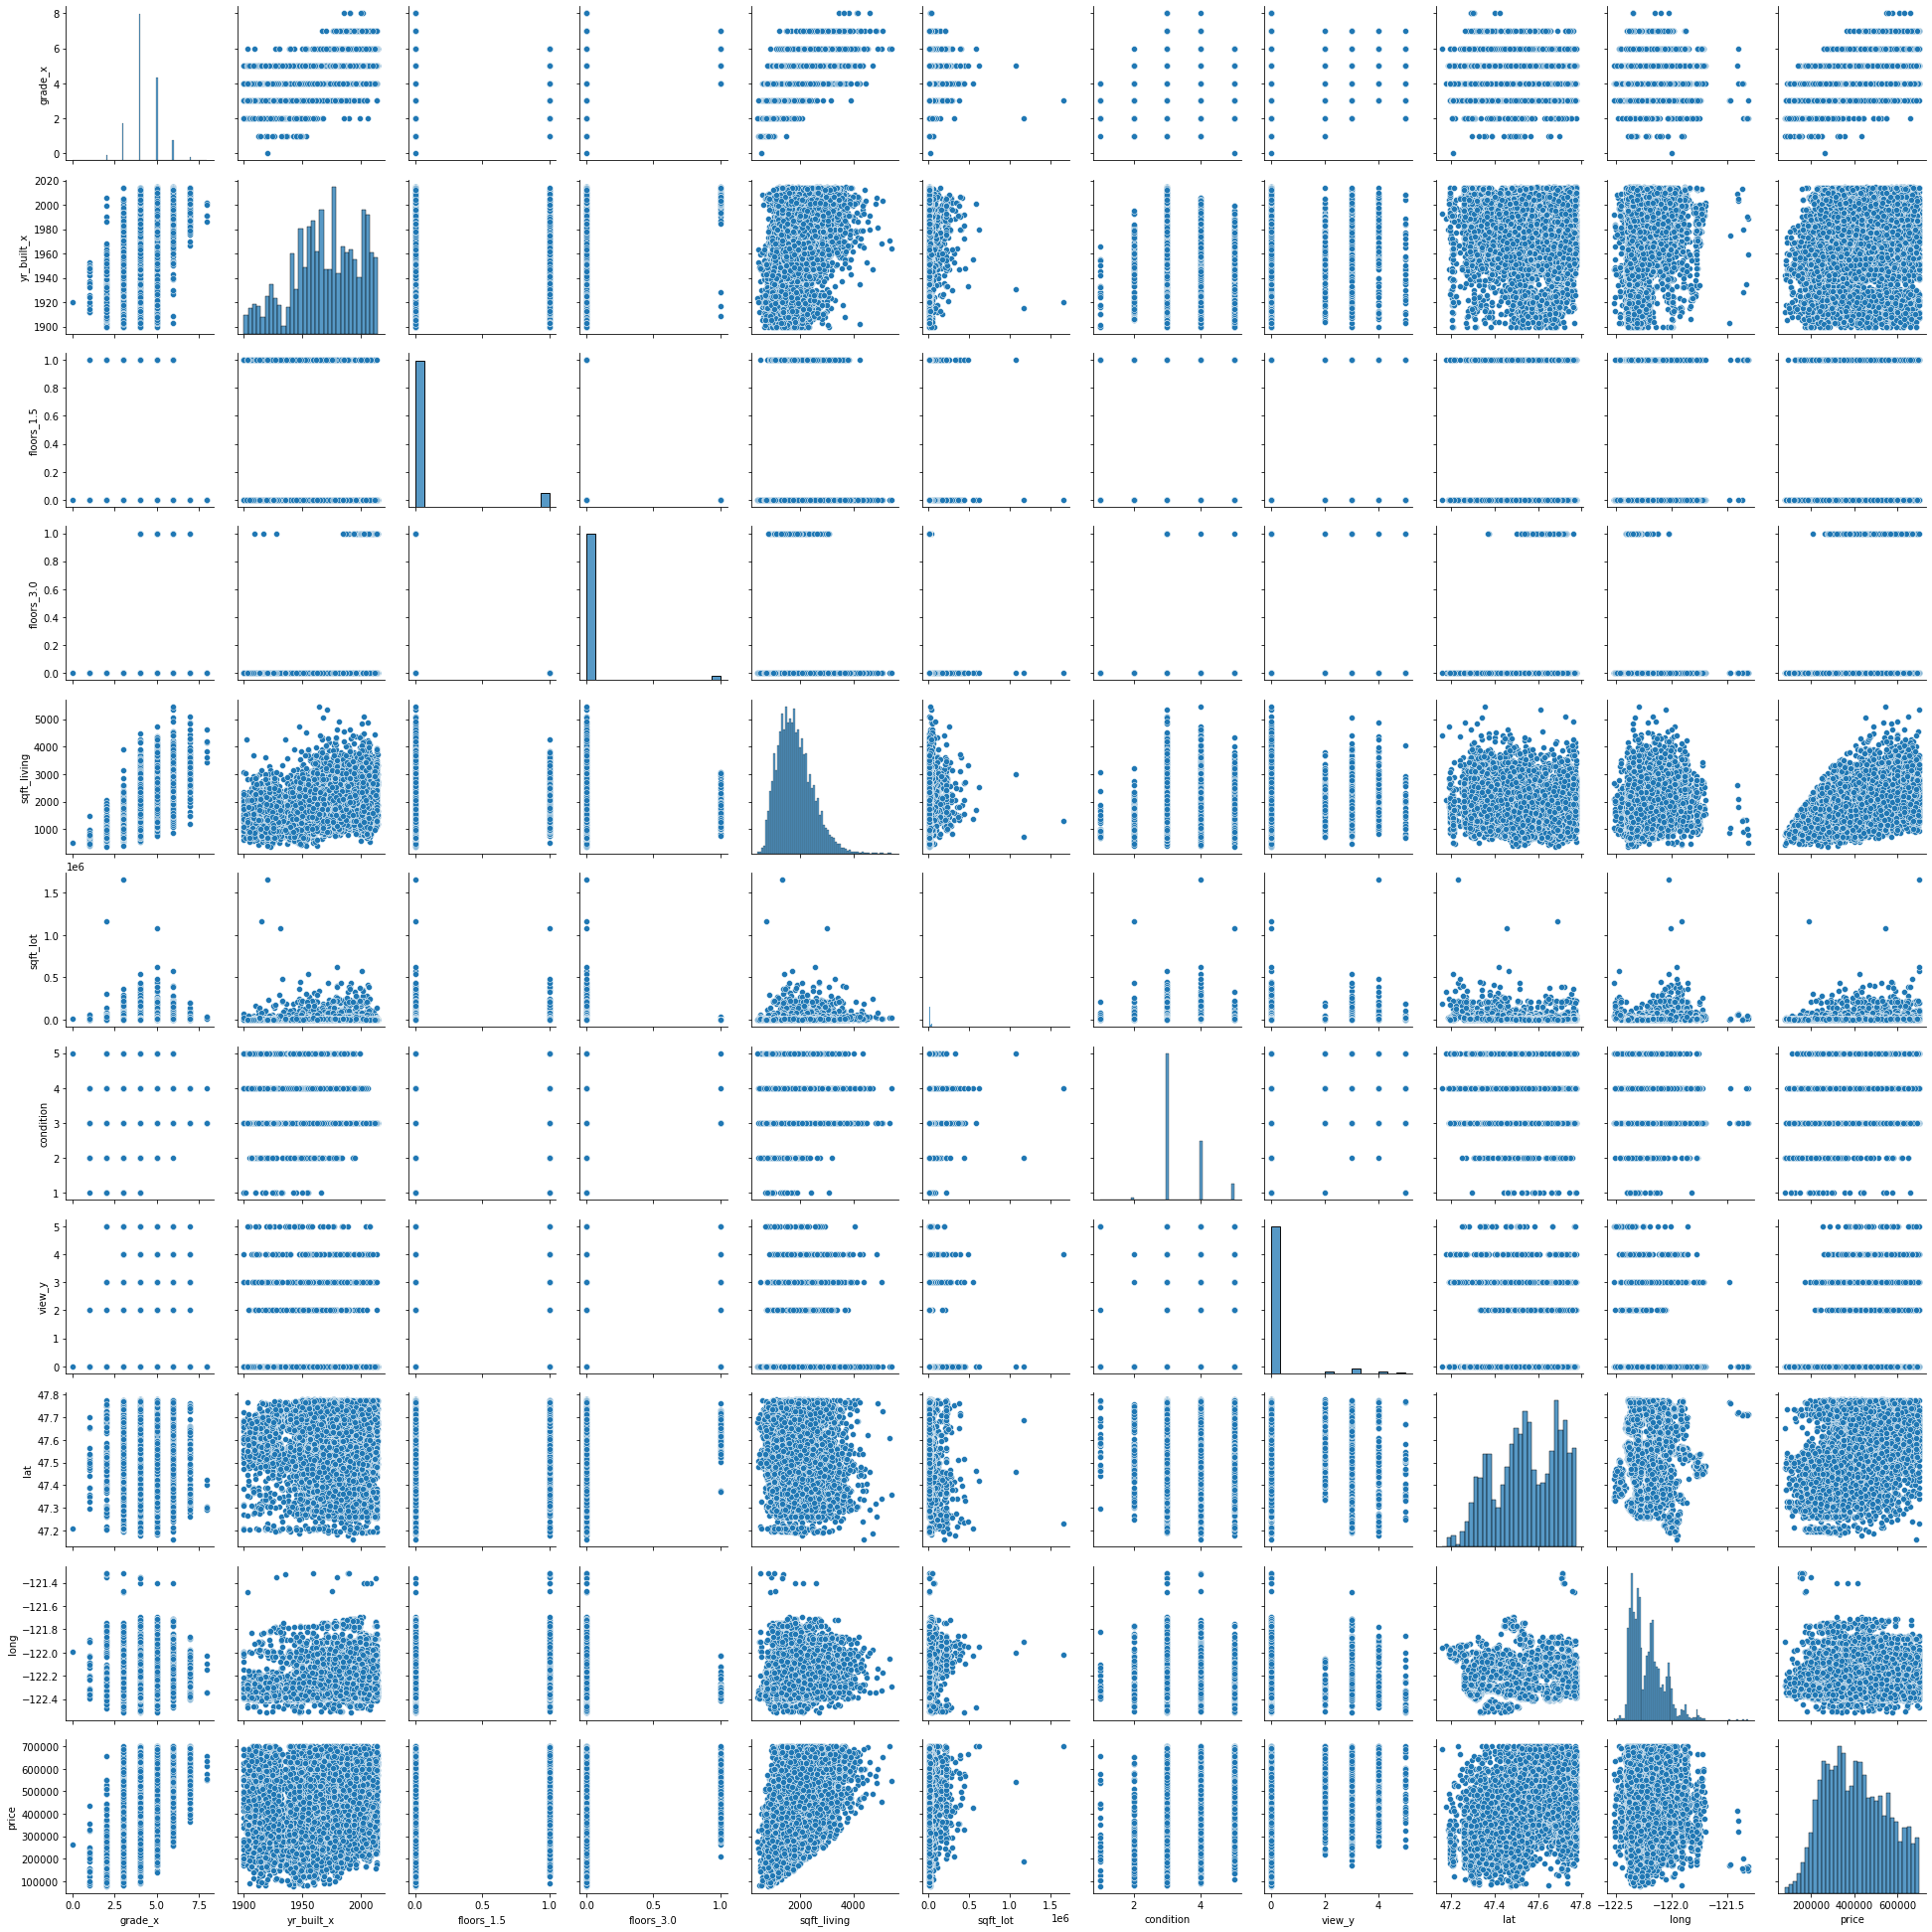

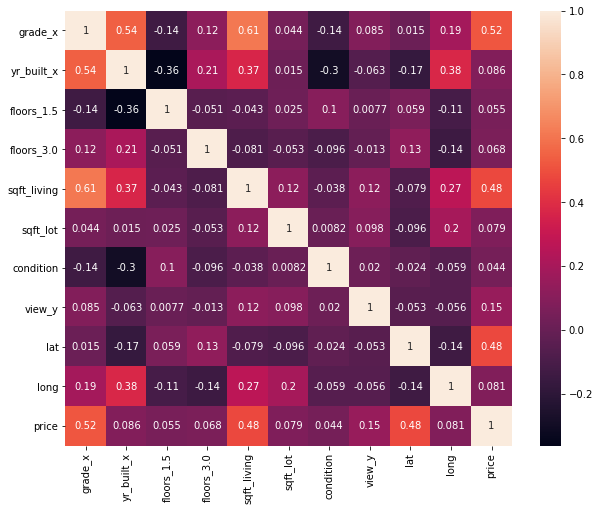

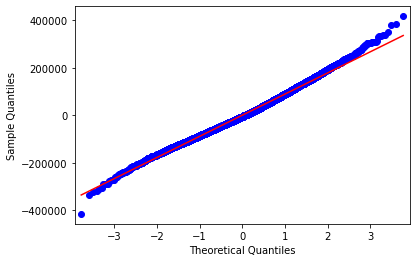

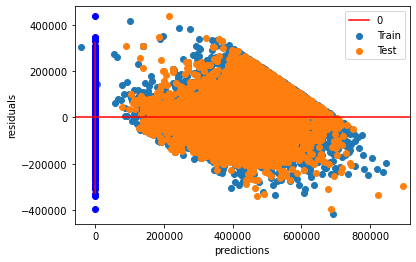

In [94]:
functions.check_assumptions(X_train[colms], y_train, train_preds, test_preds, y_test)